In [1]:
import sqlite3 
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from math import sqrt 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pydotplus
from IPython.display import Image  

In [2]:
path = "D:\\Ineuron\\Data Set"
database = path +"\\database.sqlite"
database

'D:\\Ineuron\\Data Set\\database.sqlite'

In [3]:
cnx = sqlite3.connect('database.sqlite')
cnx

In [4]:
conn = sqlite3.connect(database)

tables = pd.read_sql("""SELECT * FROM sqlite_master WHERE type='table';""", conn)
tables


,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [5]:
dd = pd.read_sql_query("""SELECT name FROM sqlite_master WHERE type='table'""", conn)

In [6]:
dd

,name
0,sqlite_sequence
1,Player_Attributes
2,Player
3,Match
4,League
5,Country
6,Team
7,Team_Attributes


In [7]:
df = pd.read_sql_query("""SELECT *  FROM Player_Attributes""", conn)

In [8]:
df

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [9]:
df.shape

(183978, 42)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [11]:
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [12]:
# finding the Missing values in Continuous data

In [13]:
for feat in df.columns:
    if df[feat].dtypes==("float64","int64"):
        print(feat,end=" column have missing value =")
        print(df[feat].isnull().sum())

overall_rating column have missing value =836
potential column have missing value =836
crossing column have missing value =836
finishing column have missing value =836
heading_accuracy column have missing value =836
short_passing column have missing value =836
volleys column have missing value =2713
dribbling column have missing value =836
curve column have missing value =2713
free_kick_accuracy column have missing value =836
long_passing column have missing value =836
ball_control column have missing value =836
acceleration column have missing value =836
sprint_speed column have missing value =836
agility column have missing value =2713
reactions column have missing value =836
balance column have missing value =2713
shot_power column have missing value =836
jumping column have missing value =2713
stamina column have missing value =836
strength column have missing value =836
long_shots column have missing value =836
aggression column have missing value =836
interceptions column have mi

In [14]:

for feat1 in df.columns:
    if df[feat1].dtypes== ("object"):
        print(feat1,end=" columns having missing values =")
        print(df[feat1].isnull().sum())

date columns having missing values =0
preferred_foot columns having missing values =836
attacking_work_rate columns having missing values =3230
defensive_work_rate columns having missing values =836


In [15]:
# Imputing the Missing values in Continuous data
for feat in df.columns:
    if df[feat].dtypes == "int64":
        df[feat].fillna(df[feat].mean(),inplace=True)

In [16]:
for feat in df.columns:
    if df[feat].dtypes == "float64":
        df[feat].fillna(df[feat].mean(),inplace=True)

In [17]:
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating            0
potential                 0
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                   0
dribbling                 0
curve                     0
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                   0
reactions                 0
balance                   0
shot_power                0
jumping                   0
stamina                   0
strength                  0
long_shots                0
aggression                0
interceptions             0
positioning               0
vision                    0
penalties                 0
marking                   0
standing_tackle     

In [18]:
# Firstly we work on df["preferred_foot"] column.
df["preferred_foot"].unique()
#df["attacking_work_rate"].head(2)
#df["defensive_work_rate"].unique()

array(['right', 'left', None], dtype=object)

In [19]:
#Now we Convert None values in Nan values
df["preferred_foot"].replace([None],np.nan,inplace=True)
df["preferred_foot"].unique()

array(['right', 'left', nan], dtype=object)

In [20]:
df["preferred_foot"].isnull().sum()

836

In [21]:
# finding the Missing values in Categorical data
from sklearn.impute import SimpleImputer
sc = SimpleImputer(strategy="most_frequent")
df["preferred_foot"] =sc.fit_transform(df[["preferred_foot"]])

In [22]:
# Secondly we work on df["attacking_work_rate"] column.
df["attacking_work_rate"].unique()

array(['medium', 'high', None, 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [23]:
df["attacking_work_rate"].replace([None],np.nan,inplace =True)
df["attacking_work_rate"].unique()
df["attacking_work_rate"].replace("None" ,np.nan,inplace=True)
df["attacking_work_rate"].unique()
df["attacking_work_rate"].isnull().sum()

6869

In [24]:
# Firstly we work on df["defensive_work_rate"] column.
df["defensive_work_rate"].unique()
df["defensive_work_rate"].replace([None],np.nan,inplace=True)
df["defensive_work_rate"].isnull().sum()

836

In [25]:
df["attacking_work_rate"] = sc.fit_transform(df[["attacking_work_rate"]])
df["defensive_work_rate"] = sc.fit_transform(df[["attacking_work_rate"]])

In [26]:
df.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


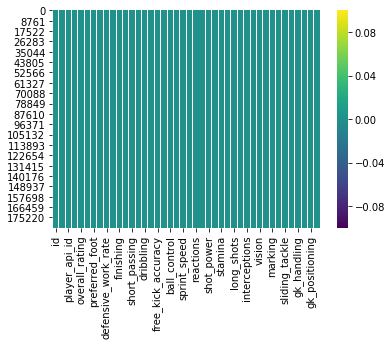

In [27]:
sns.heatmap(df.isnull(),cmap="viridis")

In [28]:
# Now we create the Cont and Categ data separately
cont_data = df.select_dtypes(["int64","float64"])

In [29]:
cont_data
cont_data.shape

(183978, 38)

In [30]:
cat_data = df.select_dtypes("object")
cat_data
cat_data.drop(["date"],1,inplace = True)
cat_data

C:\Users\devendra\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,preferred_foot,attacking_work_rate,defensive_work_rate
0,right,medium,medium
1,right,medium,medium
2,right,medium,medium
3,right,medium,medium
4,right,medium,medium
...,...,...,...
183973,right,medium,medium
183974,right,medium,medium
183975,right,medium,medium
183976,right,medium,medium


In [31]:
# Now we use Label Encoding For Categorical Variable.
from sklearn import preprocessing
lc = preprocessing.LabelEncoder()
for feat5 in cat_data.columns:
    cat_data[feat5]=lc.fit_transform(cat_data[feat5])
    

C:\Users\devendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [32]:
cat_data.head()

,preferred_foot,attacking_work_rate,defensive_work_rate
0,1,3,3
1,1,3,3
2,1,3,3
3,1,3,3
4,1,3,3


In [33]:
# now we combine both data toghether
combined_data=pd.concat([cont_data,cat_data],1)
combined_data

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate
0,1,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1,3,3
1,2,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1,3,3
2,3,218353,505942,62.0,66.0,49.0,44.0,71.0,61.0,44.0,...,66.0,69.0,6.0,11.0,10.0,8.0,8.0,1,3,3
3,4,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1,3,3
4,5,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,83.0,85.0,84.0,77.0,59.0,89.0,77.0,...,31.0,30.0,9.0,20.0,84.0,20.0,20.0,1,3,3
183974,183975,102359,39902,78.0,80.0,74.0,76.0,53.0,84.0,77.0,...,31.0,30.0,9.0,20.0,73.0,20.0,20.0,1,3,3
183975,183976,102359,39902,77.0,80.0,74.0,71.0,53.0,84.0,77.0,...,31.0,30.0,9.0,20.0,73.0,20.0,20.0,1,3,3
183976,183977,102359,39902,78.0,81.0,74.0,64.0,57.0,86.0,77.0,...,32.0,30.0,9.0,20.0,73.0,20.0,20.0,1,3,3


In [34]:
combined_data.shape

(183978, 41)

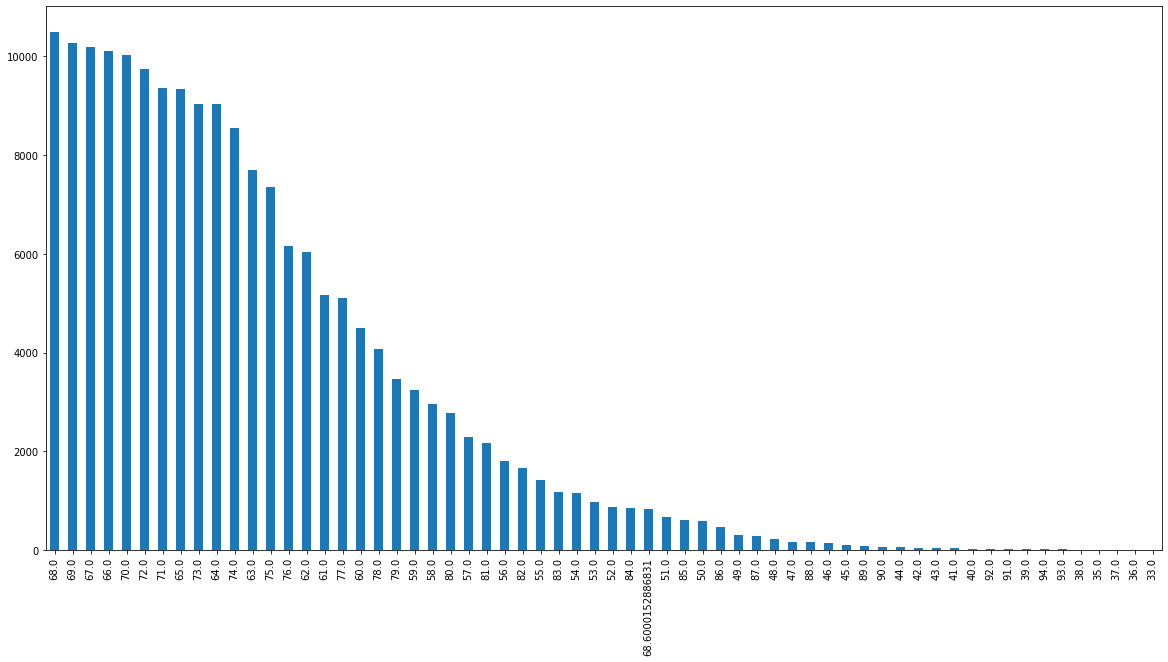

In [35]:
#Visualize column overall_rating of the dataframe
combined_data['overall_rating'].value_counts()
combined_data['overall_rating'].value_counts().plot(kind='bar',figsize=(20,10))

In [36]:
# Now we create the X and Y variable
x = combined_data.drop(["overall_rating"],1)
x.shape

(183978, 40)

In [37]:
y = combined_data["overall_rating"]
y.shape

(183978,)

In [38]:
# now we use train_test_split to give some amount of data for train and test
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=150)

In [40]:
x_train.shape ,x_test.shape , y_train.shape , y_test.shape

((128784, 40), (55194, 40), (128784,), (55194,))

# Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [42]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
y_pred = lr.predict(x_test)
y_pred

array([72.0981322 , 67.15890869, 78.73840284, ..., 67.62493828,
       63.44495548, 59.97410808])

In [44]:
from sklearn.metrics import r2_score

In [45]:
Score = r2_score(y_test,y_pred)
Score # From Linear Regression Model we Got 85 %%

0.8592291545873461

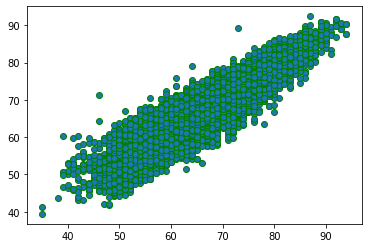

In [46]:
plt.scatter(x=y_test,y=y_pred,edgecolors="green")
#plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

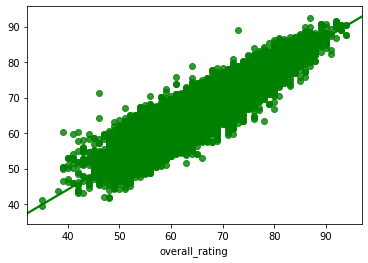

In [47]:
sns.regplot(y_test, y_pred, data=combined_data, fit_reg=True,color="green") 

# Decision Trees

In [48]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [49]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [50]:
y_pred1 =dt.predict(x_test)

In [51]:
accuracy_score = r2_score(y_test,y_pred1)
accuracy_score

0.9574146472265859

In [52]:
grid_para = {"criteria":["mse"]}

In [50]:
from sklearn.model_selection import GridSearchCV

In [54]:
gridsearc = GridSearchCV(estimator=dt,param_grid=grid_para,cv=10,n_jobs=1)

In [55]:
gridsearc.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=1, param_grid={'criteria': ['mse']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>

In [56]:
dt2 = DecisionTreeRegressor(criterion='mse', 
                            max_depth=None,
                            max_features=None,
                            max_leaf_nodes=None,
                            min_impurity_decrease=0.0,
                            min_impurity_split=None,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            min_weight_fraction_leaf=0.0,
                            presort=False, random_state=None,
                            splitter='best')

In [57]:
dt2.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [58]:
y_pred2 = dt2.predict(x_test)

In [59]:
accuracy_score2 = r2_score(y_test,y_pred2)

In [60]:
accuracy_score2

0.9577821060733168

In [ ]:
sns.regplot(y_test, y_pred2, data=combined_data, fit_reg=True,color="green") 

In [61]:
#from sklearn.tree import export_graphviz
#feature_name=list(x.columns)

# create a dot_file which stores the tree structure
#dot_data = export_graphviz(dt2,rounded = True,filled = True)
# Draw graph
#graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
#Image(graph.create_png())

# Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

C:\Users\devendra\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [43]:
y_pred3 = rf.predict(x_test)

In [45]:
accuracy4 = r2_score(y_test,y_pred3)

In [46]:
accuracy4

0.9775924936462795

In [48]:
grid_rf={
     "n_estimators" : [100,200,550,800],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}


In [51]:
gridSea_rf = GridSearchCV(estimator=rf,param_grid=grid_rf,cv=10,n_jobs=-1)
# n_jobs meaning :- This lets the computer know how many processors it is allowed to use. 
#The default value of 1 means it can only use one processor. 
#If you use -1 it means that there is no restriction of how much processing power the code can use. 
#Setting your n_jobs to -1 will often lead to faster processing.

In [53]:
gridSea_rf

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(2, 20),
         

In [ ]:
gridSea_rf.fit(x_train,y_train)